In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import ast
from scipy.stats import ttest_rel
import math
import seaborn as sns

ACTIVE_SHAM = 'Active'
GROUP1 = 'PRE'
GROUP2 = 'POST'
N = 32
mapping = {0: 'theta', 1: 'alpha', 2: 'beta'}

DF                        index       swn                                \
                       index  theta-g1  theta-g2  alpha-g1  alpha-g2   
12  Active-Hemlata-PrevsPost  0.132718  0.000000  0.247301  0.173020   
13    Active-Malti-PrevsPost  0.261066  0.148382  0.328661  0.291178   
14   Active-Preeti-PrevsPost  0.121417  0.000000  0.270821  0.371121   
15  Active-Sharifa-PrevsPost  0.187362  0.186011  0.345405  0.241652   
16   Active-Vinita-PrevsPost  0.344933  0.258145  0.443947  0.286553   
17      Active-VKS-PrevsPost  0.223313  0.209318  0.270372  0.254105   
18     Active-Nitu-PrevsPost  0.208250  0.211255  0.280838  0.276757   
19  Active-Ranjeet-PrevsPost  0.226107  0.208552  0.407285  0.331094   
20   Active-Resham-PrevsPost  0.320173  0.288429  0.392450  0.507599   
21   Active-Rithik-PrevsPost  0.223914  0.325379  0.222955  0.313696   
22    Active-Rohan-PrevsPost  0.358593  0.353389  0.298973  0.399419   
23    Active-Suman-PrevsPost  0.319938  0.396733  0.235672  0

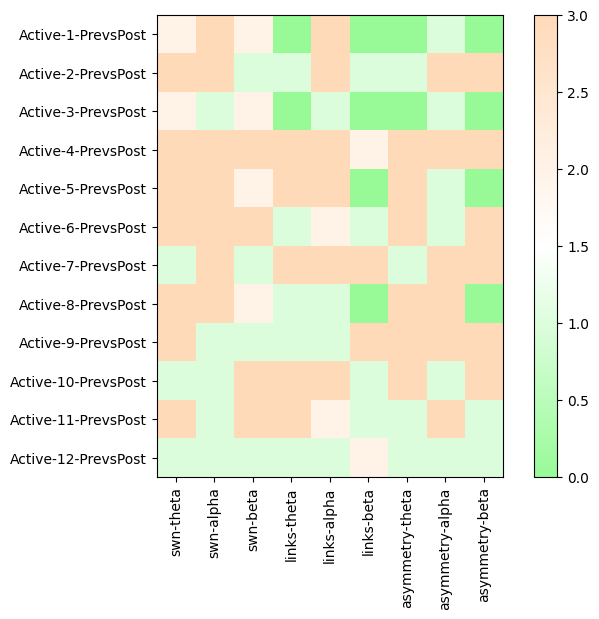

In [26]:
existing_file = f"comparison-results/result-2-{ACTIVE_SHAM}.xlsx"
df = pd.read_excel(existing_file, header=[0,1])

df_without_rows = df.drop(df.index[0:len(df)//2])
df_without_columns = df_without_rows.drop(df_without_rows.columns[0:len(df)//2+1], axis=1)
df = df_without_columns
print("DF", df)

colors = [(0.596, 0.984, 0.596), (1,1,1), (1.000, 0.855, 0.725)] # white, green, blue (0.725, 0.855, 1.000),, red
values = [1, 2, 3]
cmap = mcolors.LinearSegmentedColormap.from_list("Custom", colors, N=256)

# 0 : If swi values NaN ----- white
# 1 : If post swi > pre swi, post links > pre links, post asymmetry < pre asymmetry ----- green
# 2 : If post swi == pre swi, |post links - pre links| < 3, post asymmetry == pre asymmetry ---- blue
# 3 : If post swi < pre swi, post links < pre links, post asymmetry > pre asymmetry ----- red

condition_matrix = np.zeros((len(df), (len(df.columns)-N-1) // 2))
for j in range(len(df)): # rows
    insignificant_bands  = []
    for i in range(1, len(df.columns)-N, 2): # cols  
        # SWN  
        if i in range(1,6):
            if np.isnan(df.iloc[j, i]) or np.isnan(df.iloc[j, i+1]) or (0 in [df.iloc[j, i], df.iloc[j, i+1]]):
                condition_matrix[j, i // 2] = 2 # white
                insignificant_bands.append(i)
            # else:
            # elif np.abs(df.iloc[j, i] - df.iloc[j, i + 1]) <= 0:
            #     condition_matrix[j, i // 2] = 2 # white
            #     insignificant_bands.append(i)
            elif df.iloc[j, i] < df.iloc[j, i + 1]: 
                condition_matrix[j, i // 2] = 1 # green
            else:
                condition_matrix[j, i // 2] = 3 # red
        # LINKS
        elif i in range(6,12):
            if i-6 in insignificant_bands:
                condition_matrix[j, i // 2] = 0 # white
            elif np.abs(df.iloc[j, i] - df.iloc[j, i + 1]) <= 3: # links difference <= 5
                condition_matrix[j, i // 2] = 2 # blue
            elif df.iloc[j, i] < df.iloc[j, i + 1]:
                condition_matrix[j, i // 2] = 1 # green 
            else:
                condition_matrix[j, i // 2] = 3 # red
        # ASYMMETRY
        elif i in range(12,18):
            if i-12 in insignificant_bands:
                condition_matrix[j, i // 2] = 0 # white
            # else:
            elif np.abs(df.iloc[j, i] - 1) > np.abs(df.iloc[j, i+1] - 1): 
                condition_matrix[j, i//2] = 1 # green
            elif np.abs(np.abs(df.iloc[j, i] - 1) - np.abs(df.iloc[j, i+1] - 1)) <= 0: 
                condition_matrix[j, i//2] = 2 # blue
            else:
                condition_matrix[j, i//2] = 3 # red


lis = [f"{df.columns[i][0]}-{df.columns[i][1].split('-')[0]}" for i in range(1, len(df.columns)-N-1, 2)]
y_list = [f"{elem.split('-')[0]}-{i+1}-{elem.split('-')[-1]}" for i, elem in enumerate(list(df.iloc[:, 0]))]

plt.figure(figsize=(8, 6))
plt.imshow(condition_matrix, cmap=cmap)
plt.xticks(range(((len(df.columns)-N-1)// 2)), lis, rotation='vertical')
plt.yticks(range(len(df)), y_list)
plt.colorbar()
plt.show()

In [ ]:
# existing_file = f"comparison-results/result-Active.xlsx"
# df = pd.read_excel(existing_file, header=[0,1])
# df_without_rows = df.drop(df.index[0:len(df)//2+1])
# df_without_columns = df_without_rows.drop(df_without_rows.columns[0:len(df)//2+1], axis=1)
# active_data = df_without_columns
# existing_file = f"comparison-results/result-Sham.xlsx"
# df = pd.read_excel(existing_file)
# df_without_rows = df.drop(df.index[0:len(df)//2+1])
# df_without_columns = df_without_rows.drop(df_without_rows.columns[0:len(df)//2+1], axis=1)
# sham_data = df_without_columns

# combined_data = pd.concat([active_data, sham_data], axis=0)


# # Add the new row to the DataFrame
# for index, row in active_data.iterrows():
#     # print(f"Row {index}:\n{row}\n")
#     print(len(active_data))
#     active_data.loc[len(active_data)] = row

# print(active_data)

# Assuming 'combined_data' is your DataFrame
# print(tabulate(combined_data, headers='keys', tablefmt='psql'))


# # Create a DataFrame with your data
# data = {
#     'group': ['active']*12 + ['placebo']*6,
#     'small_worldedness': [1.2, 1.3, 1.4, 1.1, 1.5, 1.6, 1.2, 1.3, 1.4, 1.1, 1.2, 1.3, 1.4, 1.1, 1.2, 1.3, 1.4, 1.1, 1.2, 1.3],
#     'num_links': [100, 110, 95, 105, 115, 90, 100, 110, 95, 105, 100, 110, 95, 105, 100, 110, 95, 105, 100, 110],
#     'asymmetry': [0.1, 0.2, 0.3, 0.1, 0.2, 0.3, 0.1, 0.2, 0.3, 0.1, 0.2, 0.3, 0.1, 0.2, 0.3, 0.1, 0.2, 0.3, 0.1, 0.2],
#     'brain_region': ['A', 'B', 'C', 'A', 'B', 'C', 'A', 'B', 'C', 'A', 'B', 'C', 'A', 'B', 'C', 'A', 'B', 'C', 'A', 'B']
# }
# df = pd.DataFrame(data)

# # Fit a linear regression model
# model = smf.ols(formula='small_worldedness ~ group + num_links + asymmetry + brain_region', data=df)
# results = model.fit()

# # Print the regression results
# print(results.summary())


# Assuming you have loaded the data into DataFrames active_data and sham_data

# Combine the data into a single DataFrame

# # Assume 'SWI' is the dependent variable and 'freq_band_1_g1' and 'freq_band_1_g2' are independent variables
# X = combined_data[['freq_band_1_g1', 'freq_band_1_g2']]
# X = sm.add_constant(X)  # Add a constant term to the independent variables
# y = combined_data['SWI']

# # Fit the linear regression model
# model = sm.OLS(y, X).fit()

# # Print the model summary
# print(model.summary())


In [13]:
swn_values1, swn_values2 = {'theta' : [], 'alpha': [], 'beta': []} , {'theta' : [], 'alpha': [], 'beta': []}
asymmetry_values1, asymmetry_values2 = {'theta' : [], 'alpha': [], 'beta': []}, {'theta' : [], 'alpha': [], 'beta': []}
links_values1, links_values2 = {'theta' : [], 'alpha': [], 'beta': []}, {'theta' : [], 'alpha': [], 'beta': []}
hub_values1, hub_values2 = {'theta' : [], 'alpha': [], 'beta': []}, {'theta' : [], 'alpha': [], 'beta': []}

master_dict = {'swn_values': [swn_values1, swn_values2], 'asymmetry_values': [asymmetry_values1, asymmetry_values2], \
               'links_values': [links_values1, links_values2], 'hub_values': [hub_values1, hub_values2]}

for j in range(len(df)): # rows
    for k in range(1, len(df.columns)-N-1, 2): # cols 
        print(k, df.iloc[j, k])
        # SWN  
        if k in range(1,6):
            para = 'swn_values'
        elif k in range(6, 12):
            para = 'links_values'
        elif k in range(12, 18):
            para = 'asymmetry_values'

        if k%6 == 1:
            master_dict[para][0]['theta'].append(df.iloc[j, k])
            master_dict[para][1]['theta'].append(df.iloc[j, k+1])
        elif k%6 == 3:
            master_dict[para][0]['alpha'].append(df.iloc[j, k])
            master_dict[para][1]['alpha'].append(df.iloc[j, k+1])
        elif k%6 == 5:
            master_dict[para][0]['beta'].append(df.iloc[j, k])
            master_dict[para][1]['beta'].append(df.iloc[j, k+1])

    
        # for k in range(len(df.columns)-6, len(df.columns)-3, 1): #cols
        #     print(k, "&&&&&&&")
        #     print(len(ast.literal_eval(df.iloc[j, k])))

1 0.1327184839594056
3 0.2473008040493471
5 0.1037458685273595
7 66.0
9 160.0
11 32.0
13 1.766666666666667
15 1.279569892473118
17 1.294117647058824
1 0.2610659999120454
3 0.3286610540698265
5 0.1860452035220218
7 117.0
9 196.0
11 83.0
13 0.9634146341463414
15 1.052631578947368
17 0.9836065573770492
1 0.1214170532663683
3 0.2708214952318771
5 0.1316079550728673
7 88.0
9 169.0
11 72.0
13 1.150943396226415
15 0.9814814814814815
17 1.388888888888889
1 0.1873623002920176
3 0.3454046008730302
5 0.1711988621296497
7 122.0
9 183.0
11 48.0
13 1.243589743589744
15 1.055555555555556
17 1.057142857142857
1 0.34493262361993
3 0.4439466459571942
5 0.0
7 136.0
9 193.0
11 0.0
13 0.9439252336448598
15 1.264957264957265
17 1.0
1 0.223312833541609
3 0.2703719006495757
5 0.2447854569481199
7 89.0
9 184.0
11 82.0
13 0.8
15 1.212389380530974
17 0.75
1 0.2082504386048622
3 0.2808384145435363
5 0.04394791204525288
7 130.0
9 232.0
11 101.0
13 0.6548672566371682
15 1.042682926829268
17 0.7142857142857143
1 0.2

theta
theta
theta


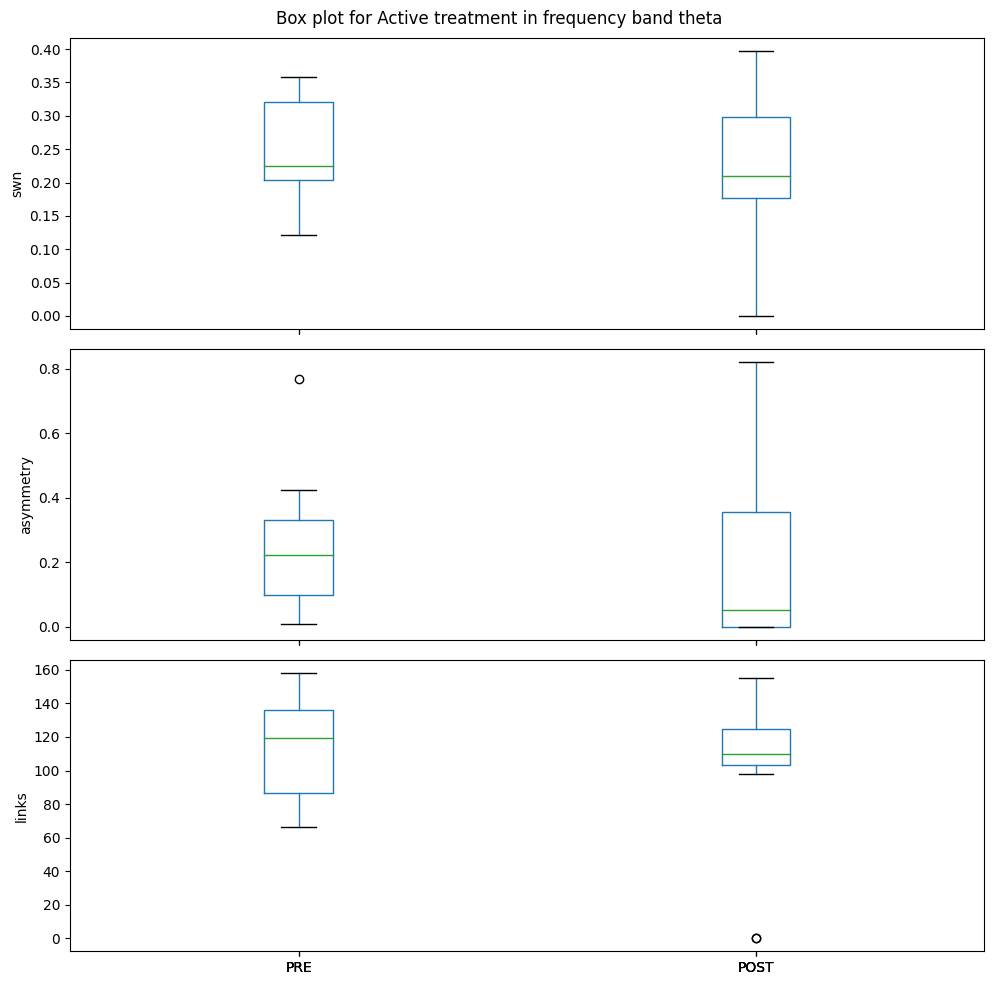

swn, p-value: 0.21005266342185938
asymmetry, p-value: 0.6531841336259725
links, p-value: 0.2566676025384826
alpha
alpha
alpha


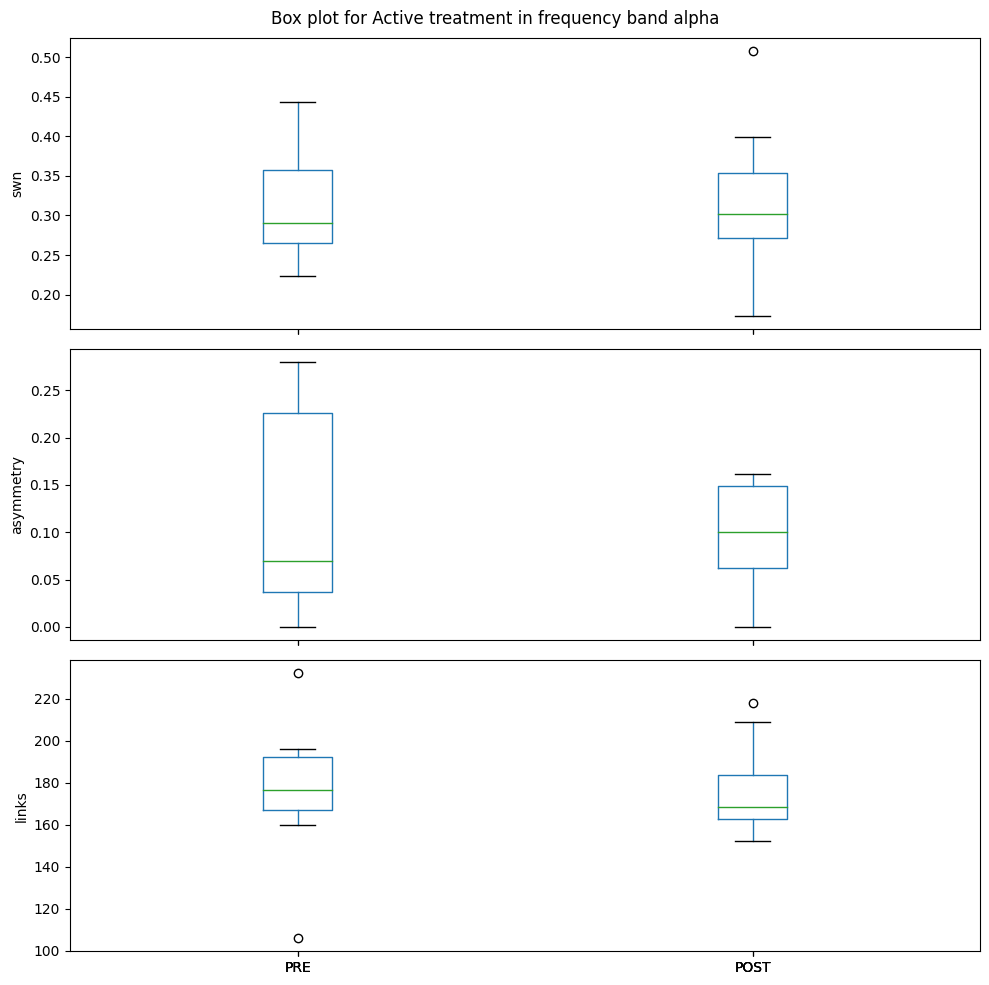

swn, p-value: 0.8859422164471326
asymmetry, p-value: 0.5389740869945495
links, p-value: 0.9873577937363069
beta
beta
beta


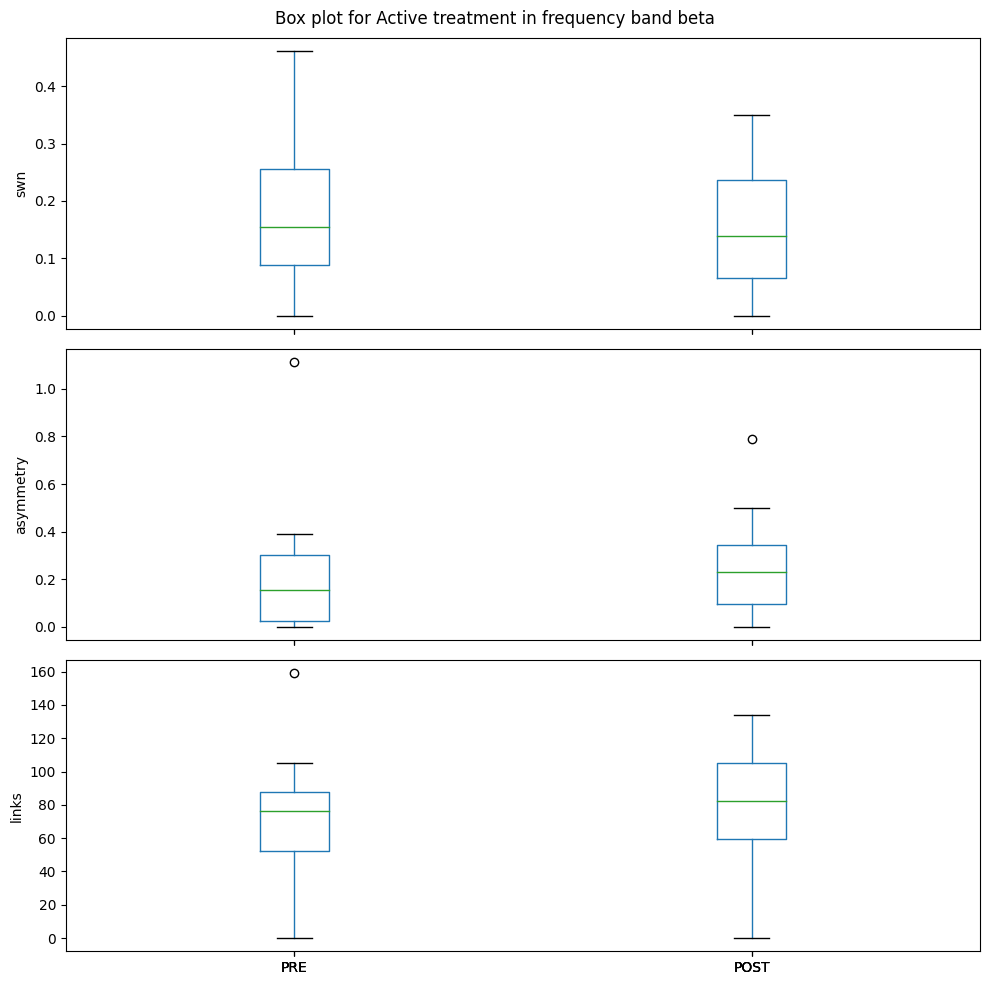

swn, p-value: 0.7801371178531722
asymmetry, p-value: 0.7919487784914802
links, p-value: 0.8444521391697728


In [14]:
for map in mapping: 
    g1_group_measures = pd.DataFrame({
        # master_dict['swn_values'][0][mapping[map]] can be replaced with swn_values1[mapping[map]]
        'swn': master_dict['swn_values'][0][mapping[map]],
        'links': master_dict['links_values'][0][mapping[map]],
        'asymmetry':  [abs(x - 1) for x in master_dict['asymmetry_values'][0][mapping[map]]]
    })


    g2_group_measures = pd.DataFrame({
        'swn': master_dict['swn_values'][1][mapping[map]],
        'links': master_dict['links_values'][1][mapping[map]],
        'asymmetry': [abs(x - 1) for x in master_dict['asymmetry_values'][1][mapping[map]]]
    })

    fig, axes = plt.subplots(3, 1, figsize=(10, 10), sharex=True)
    parameters = ['swn', 'asymmetry', 'links']

    for i, param in enumerate(parameters):
        print(mapping[map])
        df = pd.DataFrame({GROUP1: g1_group_measures[param], GROUP2: g2_group_measures[param]})
        df.boxplot(ax=axes[i], grid=False)
        # axes[i].boxplot([g1_group_measures[param], g2_group_measures[param]], labels=[GROUP1, GROUP2])
        axes[i].set_ylabel(param)

    fig.suptitle(f'Box plot for {ACTIVE_SHAM} treatment in frequency band {mapping[map]}')
    plt.tight_layout()
    plt.show()

    # Perform t-test for each parameter
    for param in parameters:
        # print("*********", g1_group_measures[param], g2_group_measures[param])
        t_stat, p_value = ttest_rel(g1_group_measures[param].dropna(), g2_group_measures[param].dropna())
        print(f"{param}, p-value: {p_value}")
        if p_value < 0.05:
            print(f"Significant difference for parameter: {param} for freq band: {mapping[map]}")